In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Company_Data.csv to Company_Data.csv


In [3]:
company = pd.read_csv('Company_Data.csv')

In [5]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [7]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [8]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [9]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [11]:
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [12]:
# Converting categorical variable into numerical variable

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder = LabelEncoder()
company.iloc[:,6] = labelencoder.fit_transform(company.iloc[:,6])

In [15]:
company.iloc[:,6]

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [16]:
#converting sales feature into categorical feature
company['Sales'] = pd.cut(company.Sales,bins=(0,7.49,16.27),labels=['lowsales','highsales'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,highsales,138,73,11,276,120,0,42,17,Yes,Yes
1,highsales,111,48,16,260,83,1,65,10,Yes,Yes
2,highsales,113,35,10,269,80,2,59,12,Yes,Yes
3,lowsales,117,100,4,466,97,2,55,14,Yes,Yes
4,lowsales,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,highsales,138,108,17,203,128,1,33,14,Yes,Yes
396,lowsales,139,23,3,37,120,2,55,11,No,Yes
397,lowsales,162,26,12,368,159,2,40,18,Yes,Yes
398,lowsales,100,79,7,284,95,0,50,12,Yes,Yes


In [17]:
company.isna().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [18]:
company=company.drop(company.index[[174]],axis=0).reset_index()
company

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,highsales,138,73,11,276,120,0,42,17,Yes,Yes
1,1,highsales,111,48,16,260,83,1,65,10,Yes,Yes
2,2,highsales,113,35,10,269,80,2,59,12,Yes,Yes
3,3,lowsales,117,100,4,466,97,2,55,14,Yes,Yes
4,4,lowsales,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
394,395,highsales,138,108,17,203,128,1,33,14,Yes,Yes
395,396,lowsales,139,23,3,37,120,2,55,11,No,Yes
396,397,lowsales,162,26,12,368,159,2,40,18,Yes,Yes
397,398,lowsales,100,79,7,284,95,0,50,12,Yes,Yes


In [19]:
company=company.drop(['index'],axis=1)

In [20]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,highsales,138,73,11,276,120,0,42,17,Yes,Yes
1,highsales,111,48,16,260,83,1,65,10,Yes,Yes
2,highsales,113,35,10,269,80,2,59,12,Yes,Yes
3,lowsales,117,100,4,466,97,2,55,14,Yes,Yes
4,lowsales,141,64,3,340,128,0,38,13,Yes,No


In [21]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [22]:
# Creating dummy variables for Urban and US
company2 = pd.get_dummies(company,columns=['Urban','US'])

In [23]:
company2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    399 non-null    int64   
 2   Income       399 non-null    int64   
 3   Advertising  399 non-null    int64   
 4   Population   399 non-null    int64   
 5   Price        399 non-null    int64   
 6   ShelveLoc    399 non-null    int64   
 7   Age          399 non-null    int64   
 8   Education    399 non-null    int64   
 9   Urban_No     399 non-null    uint8   
 10  Urban_Yes    399 non-null    uint8   
 11  US_No        399 non-null    uint8   
 12  US_Yes       399 non-null    uint8   
dtypes: category(1), int64(8), uint8(4)
memory usage: 27.1 KB


In [24]:
x = company2.iloc[:,1:]
y = company2.iloc[:,0]

In [25]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### MODEL BUIDLING USING DECISION TREE AND ENTROPY CRITERION

In [26]:
company2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    399 non-null    int64   
 2   Income       399 non-null    int64   
 3   Advertising  399 non-null    int64   
 4   Population   399 non-null    int64   
 5   Price        399 non-null    int64   
 6   ShelveLoc    399 non-null    int64   
 7   Age          399 non-null    int64   
 8   Education    399 non-null    int64   
 9   Urban_No     399 non-null    uint8   
 10  Urban_Yes    399 non-null    uint8   
 11  US_No        399 non-null    uint8   
 12  US_Yes       399 non-null    uint8   
dtypes: category(1), int64(8), uint8(4)
memory usage: 27.1 KB


In [27]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

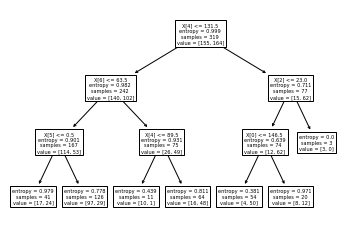

In [29]:
# plot the decision tree
tree.plot_tree(model);

In [30]:
company2['Sales'].value_counts()

lowsales     200
highsales    199
Name: Sales, dtype: int64

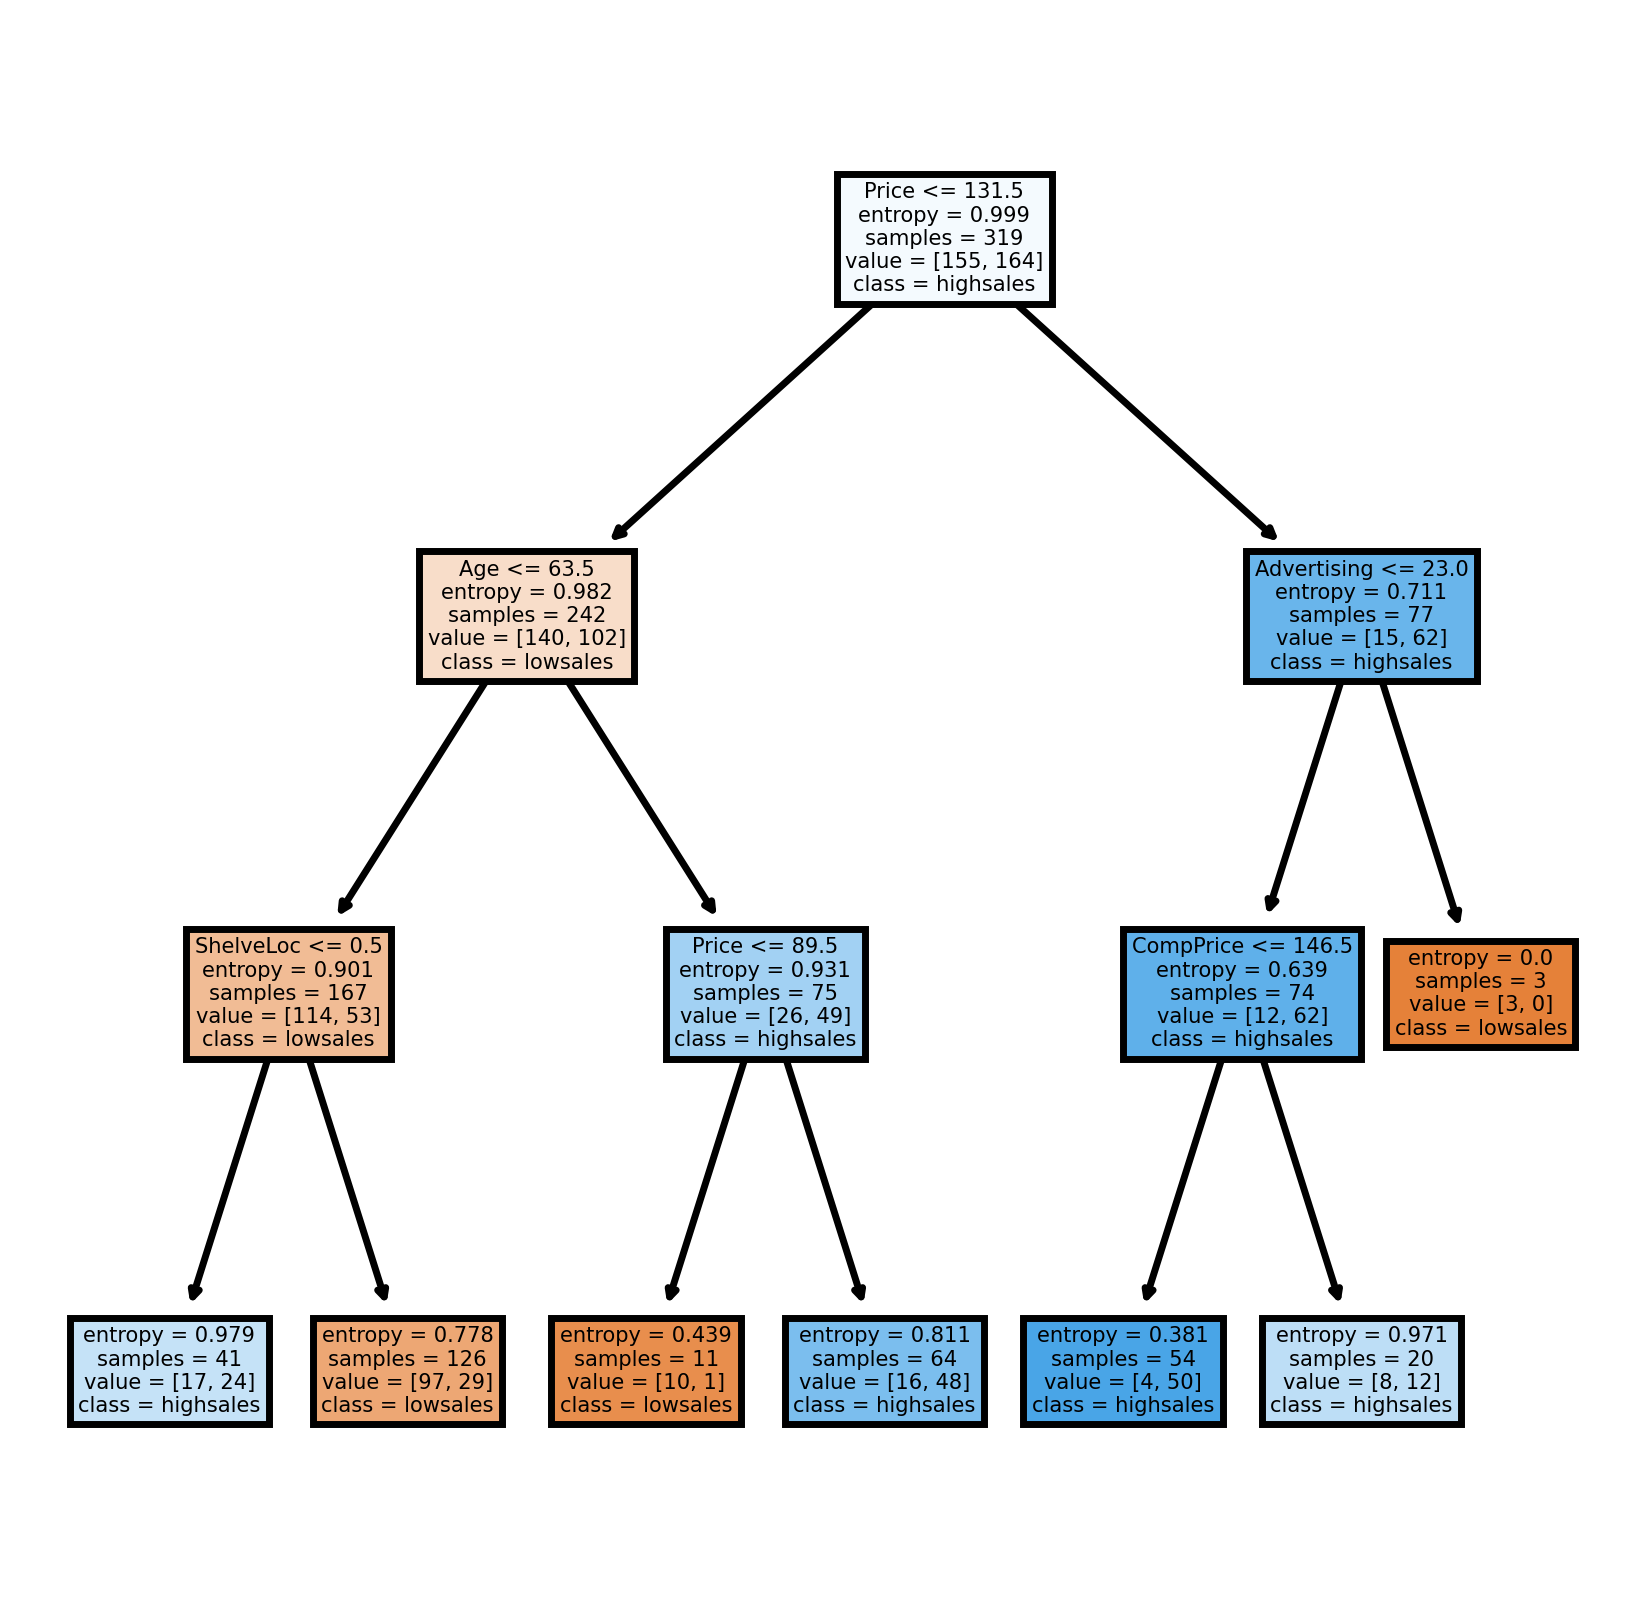

In [31]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes'] #.columns
cn=['lowsales', 'highsales']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [32]:
# predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

lowsales     41
highsales    39
dtype: int64

In [33]:
y_test.value_counts()

highsales    44
lowsales     36
Name: Sales, dtype: int64

In [34]:
preds

array(['lowsales', 'highsales', 'highsales', 'lowsales', 'highsales',
       'lowsales', 'lowsales', 'lowsales', 'highsales', 'lowsales',
       'lowsales', 'highsales', 'highsales', 'highsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'lowsales',
       'highsales', 'highsales', 'highsales', 'lowsales', 'highsales',
       'lowsales', 'lowsales', 'highsales', 'highsales', 'lowsales',
       'highsales', 'lowsales', 'highsales', 'highsales', 'lowsales',
       'lowsales', 'lowsales', 'lowsales', 'lowsales', 'highsales',
       'highsales', 'lowsales', 'highsales', 'lowsales', 'lowsales',
       'lowsales', 'highsales', 'highsales', 'highsales', 'highsales',
       'highsales', 'lowsales', 'highsales', 'lowsales', 'highsales',
       'highsales', 'highsales', 'highsales', 'lowsales', 'highsales',
       'highsales', 'highsale

In [35]:
pd.crosstab(y_test,preds)

col_0,highsales,lowsales
Sales,,
lowsales,9,27
highsales,30,14


In [36]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7125

In [37]:
np.mean(preds==y_test)

0.7125

In [38]:
#taking max_depth size=4 to check accuracy
model2=DecisionTreeClassifier(criterion='entropy', max_depth=4)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
# predicting on test data
preds = model2.predict(x_test)
pd.Series(preds).value_counts()

highsales    49
lowsales     31
dtype: int64

In [40]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7125

In [41]:
#taking max_depth size=5 to check accuracy
model3=DecisionTreeClassifier(criterion='entropy', max_depth=5)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
# predicting on test data
preds = model3.predict(x_test)
pd.Series(preds).value_counts()

highsales    46
lowsales     34
dtype: int64

In [43]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.725

In [44]:
#taking max_depth size=6 to check accuracy
model4=DecisionTreeClassifier(criterion='entropy', max_depth=6)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [45]:
# predicting on test data
preds = model4.predict(x_test)
pd.Series(preds).value_counts()

lowsales     41
highsales    39
dtype: int64

In [46]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7625

In [47]:
#taking max_depth size=7 to check accuracy
model5=DecisionTreeClassifier(criterion='entropy', max_depth=7)
model5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [48]:
# predicting on test data
preds = model5.predict(x_test)
pd.Series(preds).value_counts()

lowsales     46
highsales    34
dtype: int64

In [49]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.7

Accuracy is better at max_depth=6

# Building Decision Tree Classifier (CART) using Gini Criteria

In [62]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [63]:
model_gini.get_n_leaves()

36

In [64]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

lowsales     42
highsales    38
dtype: int64

In [65]:
preds

array(['lowsales', 'highsales', 'highsales', 'lowsales', 'highsales',
       'lowsales', 'lowsales', 'lowsales', 'lowsales', 'highsales',
       'lowsales', 'highsales', 'highsales', 'lowsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'highsales',
       'highsales', 'lowsales', 'highsales', 'highsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'lowsales',
       'highsales', 'highsales', 'highsales', 'lowsales', 'highsales',
       'lowsales', 'lowsales', 'lowsales', 'highsales', 'lowsales',
       'lowsales', 'lowsales', 'highsales', 'highsales', 'highsales',
       'lowsales', 'lowsales', 'lowsales', 'lowsales', 'highsales',
       'highsales', 'lowsales', 'highsales', 'lowsales', 'highsales',
       'lowsales', 'highsales', 'lowsales', 'highsales', 'highsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'lowsales',
       'highsales', 'highsales', 'highsales', 'lowsales', 'highsales',
       'highsales', 'highsales

In [66]:
# Accuracy 
np.mean(preds==y_test)

0.75

In [67]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

   highsales       0.70      0.82      0.76        38
    lowsales       0.81      0.69      0.74        42

    accuracy                           0.75        80
   macro avg       0.76      0.75      0.75        80
weighted avg       0.76      0.75      0.75        80

